# Data Interfaces using SQlite 3

#### In extension to my Data Engineering Certification course in July 2021, this notebook is an attempt to develop Data Interface application.

To define Data Interface in short:

Web applications use API to allow the user-facing front end to communicate with the back-end functionality and data. When a request is made on a website, an API allows the application to read the database, retrieve information from the relevant tables in the database, process the request and return an HTTP-based response to the web template, which is then displayed in the web browser. Data engineers build APIs in databases to enable data scientists and business intelligence analysts to query the data.

More References on this topic:

https://en.wikipedia.org/wiki/Interface_(computing)

https://www.analyticsvidhya.com/blog/2016/11/an-introduction-to-apis-application-programming-interfaces-5-apis-a-data-scientist-must-know/

In this notebook, the coding makes use of a basic SQLite3 commands. 

We are referring to a worldwide Sales database to understand the Customer Segment and the Product popularity. 

The database was referred from https://www.sqlitetutorial.net/sqlite-sample-database/.

### Databaseschema:

![image info](https://www.sqlitetutorial.net/wp-content/uploads/2015/11/sqlite-sample-database-color.jpg)

### The code in this notebook focuses on answering below essential user-oriented approaches and solutions

In [183]:
# importing libraries

import sqlite3 as sql
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
# Let's create a connection to our SQLite database
conn = sql.connect("C:/Users/alfa/Desktop/Python_Rest_API/learnAPI.db")

In [49]:
# Create a cursor object
cur = conn.cursor()

In [50]:
# Execute a SQL query to fetch all the table names in the database
for row in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'"):
    print(row)

('albums',)
('sqlite_sequence',)
('artists',)
('customers',)
('employees',)
('genres',)
('invoices',)
('invoice_items',)
('media_types',)
('playlists',)
('playlist_track',)
('tracks',)
('sqlite_stat1',)


### Creating a Pandas dataframe from the database to get introduced to our Tables/ Data and detailed view of the column names to perform queries

In [52]:
invoices_df = pd.read_sql_query("SELECT * from invoices", conn)

# Verify that result of SQL query is stored in the dataframe
print(invoices_df.head())

   InvoiceId  CustomerId          InvoiceDate           BillingAddress  \
0          1           2  2009-01-01 00:00:00  Theodor-Heuss-Straße 34   
1          2           4  2009-01-02 00:00:00         Ullevålsveien 14   
2          3           8  2009-01-03 00:00:00          Grétrystraat 63   
3          4          14  2009-01-06 00:00:00           8210 111 ST NW   
4          5          23  2009-01-11 00:00:00          69 Salem Street   

  BillingCity BillingState BillingCountry BillingPostalCode  Total  
0   Stuttgart         None        Germany             70174   1.98  
1        Oslo         None         Norway              0171   3.96  
2    Brussels         None        Belgium              1000   5.94  
3    Edmonton           AB         Canada           T6G 2C7   8.91  
4      Boston           MA            USA              2113  13.86  


In [54]:
customers_df = pd.read_sql_query("SELECT * from customers", conn)
# Verify that result of SQL query is stored in the dataframe
print(customers_df.head())

   CustomerId  FirstName     LastName  \
0           1       Luís    Gonçalves   
1           2     Leonie       Köhler   
2           3   François     Tremblay   
3           4      Bjørn       Hansen   
4           5  František  Wichterlová   

                                            Company  \
0  Embraer - Empresa Brasileira de Aeronáutica S.A.   
1                                              None   
2                                              None   
3                                              None   
4                                  JetBrains s.r.o.   

                           Address                 City State         Country  \
0  Av. Brigadeiro Faria Lima, 2170  São José dos Campos    SP          Brazil   
1          Theodor-Heuss-Straße 34            Stuttgart  None         Germany   
2                1498 rue Bélanger             Montréal    QC          Canada   
3                 Ullevålsveien 14                 Oslo  None          Norway   
4                

In [60]:
invoice_items_df = pd.read_sql_query("SELECT * from invoice_items", conn)
# Verify that result of SQL query is stored in the dataframe
print(invoice_items_df.head())

   InvoiceLineId  InvoiceId  TrackId  UnitPrice  Quantity
0              1          1        2       0.99         1
1              2          1        4       0.99         1
2              3          2        6       0.99         1
3              4          2        8       0.99         1
4              5          2       10       0.99         1


In [61]:
tracks_df = pd.read_sql_query("SELECT * from tracks", conn)
# Verify that result of SQL query is stored in the dataframe
print(tracks_df.head())

   TrackId                                     Name  AlbumId  MediaTypeId  \
0        1  For Those About To Rock (We Salute You)        1            1   
1        2                        Balls to the Wall        2            2   
2        3                          Fast As a Shark        3            2   
3        4                        Restless and Wild        3            2   
4        5                     Princess of the Dawn        3            2   

   GenreId                                           Composer  Milliseconds  \
0        1          Angus Young, Malcolm Young, Brian Johnson        343719   
1        1                                               None        342562   
2        1  F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...        230619   
3        1  F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...        252051   
4        1                         Deaffy & R.A. Smith-Diesel        375418   

      Bytes  UnitPrice  
0  11170334       0.99  
1   5510424 

In [62]:
genres_df = pd.read_sql_query("SELECT * from genres", conn)
# Verify that result of SQL query is stored in the dataframe
print(genres_df.head())

   GenreId                Name
0        1                Rock
1        2                Jazz
2        3               Metal
3        4  Alternative & Punk
4        5       Rock And Roll


In [107]:
playlists_df = pd.read_sql_query("SELECT * from playlists", conn)
# Verify that result of SQL query is stored in the dataframe
print(playlists_df.head())

   PlaylistId        Name
0           1       Music
1           2      Movies
2           3    TV Shows
3           4  Audiobooks
4           5  90’s Music


In [108]:
playlist_track_df = pd.read_sql_query("SELECT * from playlist_track", conn)
# Verify that result of SQL query is stored in the dataframe
print(playlist_track_df.head())

   PlaylistId  TrackId
0           1     3402
1           1     3389
2           1     3390
3           1     3391
4           1     3392


In [94]:
employees_df = pd.read_sql_query("SELECT * from employees", conn)
# Verify that result of SQL query is stored in the dataframe
print(employees_df.head())

   EmployeeId LastName FirstName                Title  ReportsTo  \
0           1    Adams    Andrew      General Manager        NaN   
1           2  Edwards     Nancy        Sales Manager        1.0   
2           3  Peacock      Jane  Sales Support Agent        2.0   
3           4     Park  Margaret  Sales Support Agent        2.0   
4           5  Johnson     Steve  Sales Support Agent        2.0   

             BirthDate             HireDate              Address      City  \
0  1962-02-18 00:00:00  2002-08-14 00:00:00  11120 Jasper Ave NW  Edmonton   
1  1958-12-08 00:00:00  2002-05-01 00:00:00         825 8 Ave SW   Calgary   
2  1973-08-29 00:00:00  2002-04-01 00:00:00        1111 6 Ave SW   Calgary   
3  1947-09-19 00:00:00  2003-05-03 00:00:00     683 10 Street SW   Calgary   
4  1965-03-03 00:00:00  2003-10-17 00:00:00         7727B 41 Ave   Calgary   

  State Country PostalCode              Phone                Fax  \
0    AB  Canada    T5K 2N1  +1 (780) 428-9482  +1 (780

In [102]:
albums_df = pd.read_sql_query("SELECT * from albums", conn)
# Verify that result of SQL query is stored in the dataframe
print(albums_df.head())

   AlbumId                                  Title  ArtistId
0        1  For Those About To Rock We Salute You         1
1        2                      Balls to the Wall         2
2        3                      Restless and Wild         2
3        4                      Let There Be Rock         1
4        5                               Big Ones         3


In [158]:
artists_df = pd.read_sql_query("SELECT * from artists", conn)
# Verify that result of SQL query is stored in the dataframe
print(artists_df.head())

   ArtistId               Name
0         1              AC/DC
1         2             Accept
2         3          Aerosmith
3         4  Alanis Morissette
4         5    Alice In Chains


# Let the Code begin and deliver Data related solutions to the business 😃

### Use Case 1 : 

Lets find the customer that has spent the most on music for each country.

1. Think of a temporary table, named as t1 that lists the total amount spent by each person, along with their country (this one is kind of easy)
2. To select only the top spenders for each country we could simply select MAX(TotalSpent) from t1 and GROUP BY Country.
3. The problem is that there are countries with 2 people that spent the same top-amount and we want them both in the final result. MAX would only return one of them.
4. Create a table t2 that contains only the max-spender by country
5. Join t1 and t2 and use the clause WHERE t1.TotalSpent = t2.MaxTotalSpent to select only top spenders at the same time you keep more than one in case they exist

In [55]:
q1 = '''
WITH t1 AS 
(
    SELECT c.Country, SUM(i.Total) TotalSpent, c.FirstName, c.LastName, c.CustomerId
    FROM 
        customers c
        JOIN invoices i ON c.CustomerId = i.CustomerId
    GROUP BY c.CustomerId
)

SELECT t1.*
FROM t1
JOIN(
    SELECT Country, MAX(TotalSpent) AS MaxTotalSpent, FirstName, LastName, CustomerId
    FROM t1
    GROUP BY Country
)t2
ON t1.Country = t2.Country
WHERE t1.TotalSpent = t2.MaxTotalSpent
ORDER BY TotalSpent DESC, Country
LIMIT 7;
'''

In [56]:
df1 = pd.read_sql(q1, conn)
df1

,Country,TotalSpent,FirstName,LastName,CustomerId
0,Czech Republic,49.62,Helena,Holý,6
1,USA,47.62,Richard,Cunningham,26
2,Chile,46.62,Luis,Rojas,57
3,Hungary,45.62,Ladislav,Kovács,45
4,Ireland,45.62,Hugh,O'Reilly,46
5,Germany,43.62,Fynn,Zimmermann,37
6,Austria,42.62,Astrid,Gruber,7


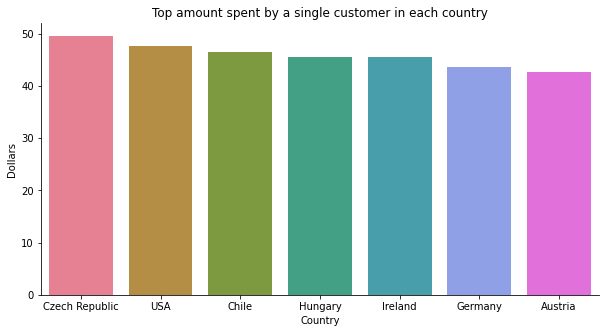

In [203]:
# Lets see the distribution of top-spenders along countries
fig, _ = plt.subplots()
fig.set_size_inches(10,5)
sns.despine()
_ = sns.barplot(x=df1.Country, y=df1.TotalSpent, palette='husl')
plt.xlabel("Country")
plt.ylabel("Dollars")
plt.title("Top amount spent by a single customer in each country")
plt.show(fig)

### Use Case 2 :
Lets see how many rock songs were purchased from each country

1. To select the Purchase details for each country we could simply select BillingCountry from Invoices.
2. To post only the transactions for the Rock category, we need to join the dataset with Tracks and Genres tables and refine it to Rock and Group BY BillingCountry.
3. Later, we need to order the results in descending order before posting it, to see the Country with Popular customers for Rock categories 

In [63]:
q2 = '''
SELECT i.BillingCountry Country, COUNT(*) RockSongsPurchased
FROM invoices i
    JOIN invoice_items il ON i.InvoiceId = il.InvoiceId
    JOIN tracks t ON il.TrackId = t.TrackId
    JOIN genres g ON t.GenreId = g.Genreid
WHERE g.Name = 'Rock'
GROUP BY BillingCountry
ORDER BY RockSongsPurchased DESC, BillingCountry
LIMIT 7;
'''

In [64]:
df2 = pd.read_sql(q2, conn)
df2

,Country,RockSongsPurchased
0,USA,157
1,Canada,107
2,Brazil,81
3,France,65
4,Germany,62
5,United Kingdom,37
6,Portugal,31


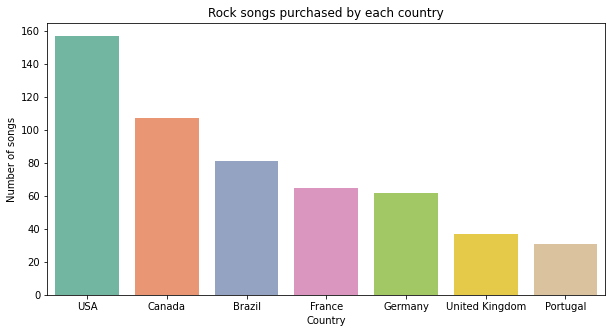

In [202]:
fig, _ = plt.subplots()
fig.set_size_inches(10, 5)
_ = sns.barplot(x=df2.Country, y=df2.RockSongsPurchased, palette='Set2')
plt.xlabel("Country")
plt.ylabel("Number of songs")
plt.title("Rock songs purchased by each country")
plt.show(fig)

### Use Case 3 :

Lets see how yearly income varies according to genre

In [186]:
q3 = '''
SELECT
    STRFTIME('%Y', i.InvoiceDate) Year, 
    SUM(il.Quantity * il.UnitPrice) Income,
    g.Name GenreName
FROM invoices i
    JOIN invoice_items il
    ON i.InvoiceId = il.InvoiceId
    JOIN tracks t
    ON t.TrackId = il.TrackId
    JOIN genres g
    ON t.GenreId = g.GenreId
WHERE GenreName IN ('Rock', 'Blues', 'Bossa Nova', 'Jazz', 'Latin')
GROUP BY 1,3;
'''

In [71]:
df3 = pd.read_sql(q3, conn)
df3.head()

,Year,Income,GenreName
0,2009,10.89,Blues
1,2009,0.99,Bossa Nova
2,2009,19.80,Jazz
3,2009,82.17,Latin
4,2009,178.20,Rock


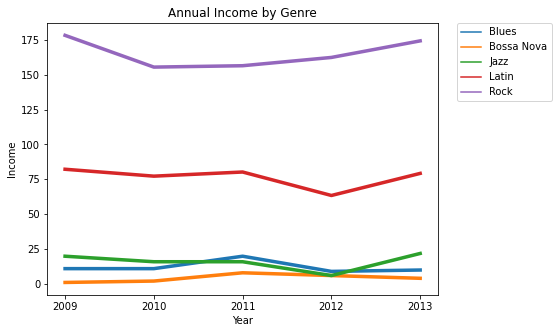

In [207]:
fig, _ = plt.subplots()
fig.set_size_inches(7,5)
ax = sns.lineplot(x='Year', y='Income', hue='GenreName',data=df3)
plt.title("Annual Income by Genre")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
for l in ax.lines:
    plt.setp(l, linewidth=3.5)

### Use Case 4 :

Lets see how monthly income varies in 2013 for Rock genre

In [73]:
q4 = '''
SELECT
    STRFTIME('%Y', i.InvoiceDate) Year, 
    STRFTIME('%m', i.InvoiceDate) Month,
    SUM(il.Quantity * il.UnitPrice) Income,
    g.Name GenreName
FROM invoices i
    JOIN invoice_items il
    ON i.InvoiceId = il.InvoiceId
    JOIN tracks t
    ON t.TrackId = il.TrackId
    JOIN genres g
    ON t.GenreId = g.GenreId
WHERE GenreName = 'Rock' AND Year = '2013'
GROUP BY 1,2;
'''

In [221]:
df4 = pd.read_sql(q4, conn)
df4.head()

,Year,Month,Income,GenreName
0,2013,01,6.93,Rock
1,2013,02,16.83,Rock
2,2013,03,5.94,Rock
3,2013,04,9.90,Rock
4,2013,05,10.89,Rock


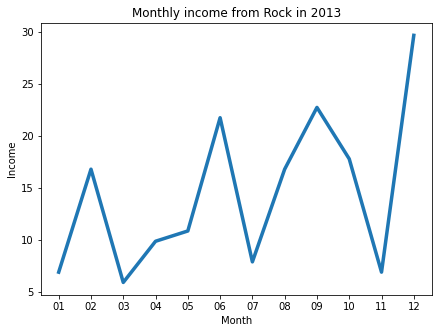

In [208]:
fig, _ = plt.subplots()
fig.set_size_inches(7,5)
ax = sns.lineplot(x='Month', y='Income', data=df4)
plt.title("Monthly income from Rock in 2013")
for l in ax.lines:
    plt.setp(l, linewidth=3.5)

### Use Case 5 :

Lets see the most popular Genre sold in Germany and the no. of Tracks sold

In [104]:
q5 = '''
WITH germany_tracks_sold AS
    (
    SELECT il.* FROM invoice_items il
    INNER JOIN invoices i on i.InvoiceId = il.InvoiceId
    INNER JOIN customers c on c.CustomerId = i.CustomerId
    WHERE c.country = "Germany"
    )

SELECT
    g.name genres,
    count(uts.InvoiceLineId) tracks_sold,
    cast(count(uts.InvoiceLineId) AS FLOAT) / (
        SELECT COUNT(*) from germany_tracks_sold
    ) percentage_sold
FROM germany_tracks_sold uts
INNER JOIN tracks t on t.TrackId = uts.TrackId
INNER JOIN genres g on g.GenreId = t.GenreId
GROUP BY 1
ORDER BY 2 DESC
LIMIT 10;'''

In [220]:
df5 = pd.read_sql(q5, conn)
df5.head()

,genres,tracks_sold,percentage_sold
0,Rock,62,0.407895
1,Metal,25,0.164474
2,Latin,18,0.118421
3,Blues,14,0.092105
4,Alternative & Punk,13,0.085526


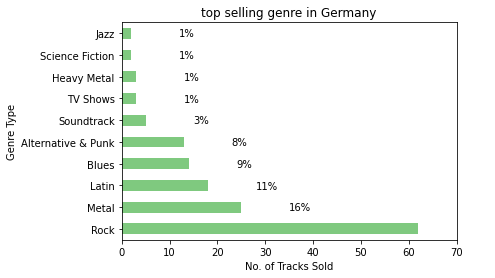

In [218]:
genre_sales_germany = pd.read_sql(q5, conn)
genre_sales_germany.set_index('genres',drop= True, inplace = True)
genre_sales_germany['tracks_sold'].plot.barh(
                title = 'top selling genre in Germany',
                xlim = (0,650),
                colormap = plt.cm.Accent
                )
plt.ylabel('Genre Type')
plt.xlabel('No. of Tracks Sold')
plt.xlim([0, 70])
for i, label in enumerate(list(genre_sales_germany.index)):
    score = genre_sales_germany.loc[label, 'tracks_sold']
    label = (genre_sales_germany.loc[label, 'percentage_sold'] * 100).astype(int).astype(str) + '%'
    plt.annotate(str(label),(score+10,i-0.15))
plt.show()

Based on the sales trend in Germany, its worth introducing Rock Genre with highest selling value of more than 62% with 37% difference stands Metal genre popular in the country

### Use Case 6 :

Lets see which countries have the most Invoices

In [112]:
# Select only data for which countries have the most Invoices
q6 = '''
SELECT BillingCountry AS billingCountry,
       COUNT(*)       AS invoices 
  FROM invoices 
GROUP BY BillingCountry 
ORDER BY invoices DESC;'''

In [219]:
df6 = pd.read_sql_query(q6, conn)
df6.head()

,billingCountry,invoices
0,USA,91
1,Canada,56
2,France,35
3,Brazil,35
4,Germany,28


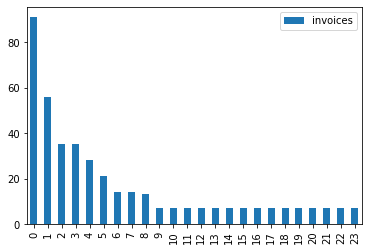

In [119]:
df6.plot.bar(stacked=True);

### Use Case 7 :

Lets see which city has the best customers

In [136]:
q7 = '''
SELECT CustomerId AS customerId,
       SUM(Total) AS money_spent 
  FROM invoices 
GROUP BY CustomerId 
ORDER BY money_spent DESC 
 LIMIT 1;'''

In [137]:
df7 = pd.read_sql_query(q7, conn)
df7

,customerId,money_spent
0,6,49.62


### Use Case 8 :

Lets see who is writing the rock music.

Now that we know that our customers love rock music, we can decide which musicians to invite to play at the concert. Let's invite the artists who have written the most rock music in our dataset. Write a query that returns the Artist name and total track count of the top 10 rock bands.

In [171]:
q8 = '''SELECT artists.ArtistId   AS artistId,
       artists.Name       AS name,
       COUNT(tracks.Name) AS Songs 
  FROM artists JOIN albums 
    ON albums.ArtistId = artists.ArtistId JOIN tracks 
    ON albums.AlbumId = tracks.AlbumId JOIN genres 
    ON tracks.GenreId = genres.GenreId 
 WHERE genres.Name = 'Rock' 
GROUP BY artists.ArtistId,
       artists.Name,
       genres.Name 
ORDER BY Songs DESC 
 LIMIT 10; '''

In [223]:
df8 = pd.read_sql_query(q8, conn)
df8.head()

,artistId,name,Songs
0,22,Led Zeppelin,114
1,150,U2,112
2,58,Deep Purple,92
3,90,Iron Maiden,81
4,118,Pearl Jam,54


### Use Case 9:

Lets see, we want to find out the most popular music Genre for each country. We determine the most popular genre as the genre with the highest amount of purchases. Write a query that returns each country along with the top Genre. For countries where the maximum number of purchases is shared return all Genres.

In [173]:
q9 = ''' WITH t1 AS (
    SELECT
        COUNT(i.InvoiceId) Purchases, c.Country, g.Name, g.GenreId
    FROM invoices i
        JOIN customers c ON i.CustomerId = c.CustomerId
        JOIN invoice_items il ON il.Invoiceid = i.InvoiceId
        JOIN tracks t ON t.TrackId = il.Trackid
        JOIN genres g ON t.GenreId = g.GenreId
        GROUP BY c.Country, g.Name
    ORDER BY c.Country, Purchases DESC
    )

SELECT t1.*
FROM t1
JOIN (
    SELECT MAX(Purchases) AS MaxPurchases, Country, Name, GenreId
    FROM t1
    GROUP BY Country
    )t2
ON t1.Country = t2.Country
WHERE t1.Purchases = t2.MaxPurchases; '''

In [222]:
df9 = pd.read_sql_query(q9, conn)
df9.head()

,Purchases,Country,Name,GenreId
0,9,Argentina,Rock,1
1,9,Argentina,Alternative & Punk,4
2,22,Australia,Rock,1
3,15,Austria,Rock,1
4,21,Belgium,Rock,1


### Use Case 10 :

Lets return all the track names that have a song length longer than the average song length. Though you could perform this with two queries. Imagine you wanted your query to update based on when new data is put in the database. Therefore, you do not want to hard code the average into your query. You only need the Track table to complete this query.

In [179]:
q10 = ''' 
SELECT Name, Milliseconds FROM (
    SELECT t.Name, t.Milliseconds, (SELECT AVG(Milliseconds) FROM tracks) AS AvgLenght
    FROM tracks t
    WHERE AvgLenght < t.Milliseconds
    ORDER BY t.Milliseconds DESC
); '''

In [180]:
df10 = pd.read_sql_query(q10, conn)
df10

,Name,Milliseconds
0,Occupation / Precipice,5286953
1,Through a Looking Glass,5088838
2,"Greetings from Earth, Pt. 1",2960293
3,The Man With Nine Lives,2956998
4,"Battlestar Galactica, Pt. 2",2956081
...,...,...
489,22 Acacia Avenue,395572
490,The Unforgiven II,395520
491,The Shortest Straw,395389
492,"Concerto for Clarinet in A Major, K. 622: II. ...",394482


### Use Case 11 :

Lets write a query that determines the customer that has spent the most on music for each country. 

Write a query that returns the country along with the top customer and how much they spent. For countries where the top amount spent is shared, provide all customers who spent this amount.

In [181]:
q11 = ''' 

WITH t1 AS 
(
    SELECT c.Country, SUM(i.Total) TotalSpent, c.FirstName, c.LastName, c.CustomerId
    FROM 
        customers c
        JOIN invoices i ON c.CustomerId = i.CustomerId
    GROUP BY c.CustomerId
)

SELECT t1.*
FROM t1
JOIN(
    SELECT Country, MAX(TotalSpent) AS MaxTotalSpent, FirstName, LastName, CustomerId
    FROM t1
    GROUP BY Country
)t2
ON t1.Country = t2.Country
WHERE t1.TotalSpent = t2.MaxTotalSpent
ORDER BY Country; ''' 

In [224]:
df11 = pd.read_sql_query(q11, conn)
df11.head()

,Country,TotalSpent,FirstName,LastName,CustomerId
0,Argentina,37.62,Diego,Gutiérrez,56
1,Australia,37.62,Mark,Taylor,55
2,Austria,42.62,Astrid,Gruber,7
3,Belgium,37.62,Daan,Peeters,8
4,Brazil,39.62,Luís,Gonçalves,1


Now, lets replace or create a table

In [225]:
# Write the new DataFrame to a new SQLite3 table
df10.to_sql("Length_of_Track", conn, if_exists="replace")

In [226]:
# Write the new DataFrame to a new SQLite3 table
df8.to_sql("Rock_music_composers", conn, if_exists="replace")

In [228]:
#Droping Length_of_Track table if already exists
cur.execute("DROP TABLE Length_of_Track")
print("Table dropped successfully from the database ")

Table dropped from the database 


In [229]:
#Commit your changes in the database
conn.commit()

In [230]:
#Closing the connection
conn.close()

# Thank you !!